In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Database_practice/shopeep_koreantop_clothing_shop_data.csv')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


# Yêu cầu vẽ biểu đồ kết hợp để trực quan hóa thông tin sau:

# 1.Vẽ biểu đồ:
# So sánh số lượng shop gia nhập theo các năm.
# Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.


In [27]:
# Tính số lượng shop gia nhập theo năm
df1 = df.groupby(['join_year'])['pk_shop'].count()
df1

join_year
2015      4
2016     27
2017    156
2018     87
2019    106
2020    247
2021    119
Name: pk_shop, dtype: int64

In [28]:
# số lượng shop gia nhập theo từng tháng trong từng năm.
df2 = df.groupby(['join_month'])['pk_shop'].count().reset_index()
df2

,join_month,pk_shop
0,April,74
1,August,57
2,December,55
3,February,30
4,January,49
5,July,46
6,June,50
7,March,75
8,May,75
9,November,54


In [31]:
# Tạo dict tháng
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 
              'August':8, 'September':9, 'October':10, 'November':11, 'December':12}


In [32]:
# Tạo dataframe theo tháng
df3 = df2.sort_values('join_month', key = lambda x : x.apply (lambda x : month_dict[x]))
df3

,join_month,pk_shop
4,January,49
3,February,30
7,March,75
0,April,74
8,May,75
6,June,50
5,July,46
1,August,57
11,September,87
10,October,94


C:\Users\admin\AppData\Local\Temp\ipykernel_18440\2307648772.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(df2['join_month'], rotation=45)


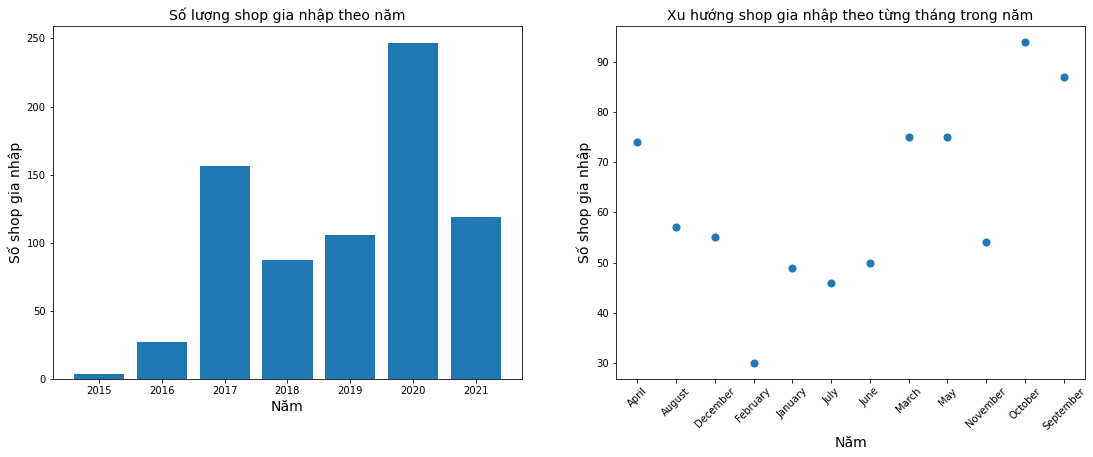

In [34]:
fig,ax=plt.subplots(1,
                   2)
# So sánh số lượng shop gia nhập theo các năm.
ax[0].bar(df1.index,df1.values)
ax[0].set_title('Số lượng shop gia nhập theo năm',fontsize = 14)
ax[0].set_xlabel('Năm',fontsize=14)
ax[0].set_ylabel('Số shop gia nhập',fontsize=14)


# Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.

ax[1].scatter(df2['join_month'],df2['pk_shop'], s = 50)
ax[1].set_title('Xu hướng shop gia nhập theo từng tháng trong năm',fontsize = 14)
ax[1].set_xlabel('Năm',fontsize=14)
ax[1].set_ylabel('Số shop gia nhập',fontsize=14)
ax[1].set_xticklabels(df2['join_month'], rotation=45)


fig.set_size_inches(18.5,6.5)

plt.show()

- Số lượng shop gia nhập năm 2015 là thấp nhất
- Số lượng shop gia nhập năm 2020 là cao nhất
- Số lượng shop gia nhập vào các tháng 10 và 9 tăng cao

# 2.Vẽ biểu đồ thể hiện mối quan hệ giữa 
# Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt
# Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.


In [35]:
df['response_time_second'] = df['response_time'].str.slice(7,9)
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop,response_time_second
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0,55
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0,05
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0,07
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0,38
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0,59


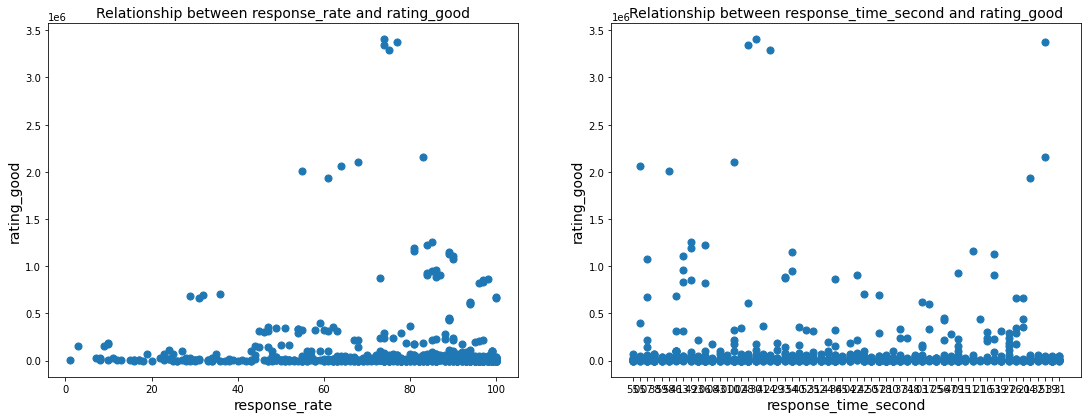

In [37]:
fig,ax=plt.subplots(1,
                   2)
# Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt
ax[0].scatter(df['response_rate'], df['rating_good'], s = 50)
ax[0].set_title('Relationship between response_rate and rating_good',fontsize = 14)
ax[0].set_xlabel('response_rate',fontsize=14)
ax[0].set_ylabel('rating_good',fontsize=14)


# Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.

ax[1].scatter(df['response_time_second'], df['rating_good'], s = 50)
ax[1].set_title('Relationship between response_time_second and rating_good',fontsize = 14)
ax[1].set_xlabel('response_time_second',fontsize=14)
ax[1].set_ylabel('rating_good',fontsize=14)



fig.set_size_inches(18.5,6.5)

plt.show()

Thời gian phản hồi và tỷ lệ hồi so với số lượt đánh giá tốt không có quan hệ gì.

# 3.Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình.   

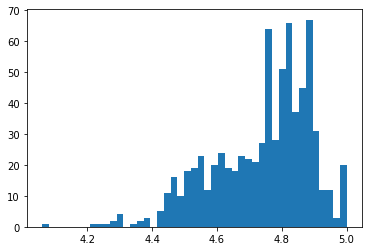

In [38]:
plt.hist(df['rating_star'], bins = 45)
plt.show()

Điểm đánh giá trung bình phân bố chủ yếu từ thang điểm 4.8 đến 5.0